# <center> Digit Classification with SVD <center>

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # show images as svg

import numpy as np
import scipy
import scipy.io
import matplotlib.pyplot as plt
from functions import data_manipulation, image_manipulation 
import cv2 as cv
# set a seed
np.random.seed(1)

We are loading the dataset into the $X$ and $I$ matrices. $X$ is a $1707 \times 256 $ matrix where each row is a single picture (so we have 1707 pictures) that was initially a $16 \times 16$ image but was "flattened" into a $256 \times 1$ array and $1707$ of them were stacked into $X$. $I$ is a $1707 \times 1$ vector that contains the labels of the digits. So the *i-th* element of $I$ is the digit value of the *i-th* row of $X$. 

We are going to use the function `functions.organize_data` to organize our data since it is initially mixed. This function will return three dictionaries: 
- `digit_dict` $\to$ Contains $10$ dictionaries $X_{i} $ where $ i= \{0, \dots 9 \} $ and each dictionary contains only the corresponding digit $i$
- `train_test_dict` $\to$ Contains $2$ dictionaries `train_dict` and `test_dict` which were obtained from the `digit_dict` by splitting the data into a training and testing set by a given ratio (more on this later)
- `svd_dict` $\to$ Contains three dictionaries `U`, `S`, `V` which contain the $U$, $S$ and $V$ matrices from the SVD decomposition of each digit in the training set data


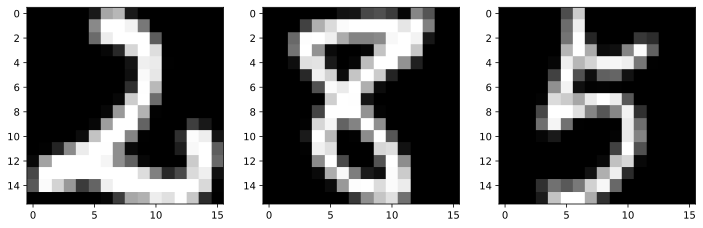

In [2]:
# Load the data
raw_data = scipy.io.loadmat("./data/MNIST.mat")
X = raw_data["X"].T # data (1707 images x 256 pixels)
I = raw_data["I"].T # labels (1707 labels x 1)
digit_dict, test_train_dict, svd_dict = data_manipulation.organize_data(X, I)
# data is a dictionary that contains 3 more dictionaries: "digit_dict", "test_train_dict", "svd_dict"
plt.figure(figsize=(12, 4))
y1 = digit_dict["X2"][0,:]
plt.subplot(1,3,1)
plt.imshow(y1.reshape(16,16), cmap='gray'); 
y2 = digit_dict["X8"][5,:]
plt.subplot(1,3,2)
plt.imshow(y2.reshape(16,16), cmap='gray'); 
y3 = digit_dict["X5"][10,:]
plt.subplot(1,3,3)
plt.imshow(y3.reshape(16,16), cmap='gray'); 

Let us consider that we have an unknown digit $y$, we now will have to compute all projections of $y$, that is $y_{0}^{\perp} \dots y_{9}^{\perp}$ and compute the distance vector between $y$ and all of its projections that is:
$$ d = \begin{bmatrix}
||y -  y_{0}^{\perp}|| & \cdots & ||y -  y_{9}^{\perp}||
\end{bmatrix}^T $$ 
Now the index of $ \min (d) $ is the desired digit.

The function that does the previous thing is `functions.test_digit` which takes the `svd_dict` (the SVD decomposition dictionary for the training set) and the unknown digit $y$ from the test set and returns the expected value of the digit and the distance vector.

[[3.21506809 3.21268302 2.97697138 2.76270843 1.77426651 2.85172771
  2.51164458 2.24903984 1.80511886 0.86390609]]
You have written the number 9


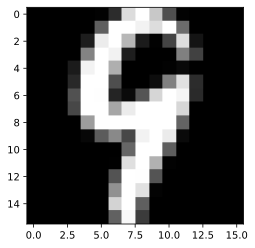

In [3]:
y = test_train_dict["X_test"]["X9"][11,:]
out, dist = data_manipulation.test_digit(svd_dict, y)
print(dist.T)
print("You have written the number " + str(out))
plt.imshow(y.reshape(16,16), cmap='gray'); 

One has to pay attention so a specific thing about splitting the data and that is the amount the data for each class. The dataset doesn't contain the same number of instances for each class which in itself is not a problem but when one class has a particularly high number of samples in contrast to others then the results can be biased. So to counter that for this dataset we will fix the number of training data samples to be the same for each class so we have an even distribution of classification for each digit.

One more issue that can arise is that we are dealing with high dimension matrices and due to the computation error we also don't want a too big training because of the SVD computation.

Let us now talk about the accuracy of this classification method. The accuracy is computed on the test dataset with the function `lab2_funs.test_accuracy` which takes the test dataset, the SVD dictionary and the number of samples on which to compute the classification. It returns the percentage of accuracy and a dictionary of wrongly classified samples. This functions ensures that the same samples won't be repeated twice when classifying, and that we take random samples from random classes.

In [4]:
# percentage of wrong classification
per, wrong_class = data_manipulation.test_accuracy(test_train_dict["X_test"], svd_dict, 400)
print(per)

94.75


A percentage of $ 94.75 \% $ on a test dataset of $400$ is impressive. Let us see some wrongly classified classes from `wrong_class` dictionary.

[[3.1540151  0.52546053 2.74409191 3.03648002 1.88835722 3.02096527
  2.41215807 2.20765067 1.31752031 1.95329538]]
You have written the number 1


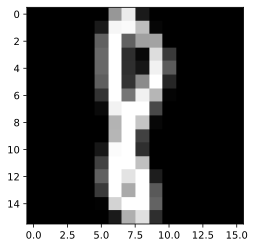

In [5]:
y = wrong_class[0]
out, dist = data_manipulation.test_digit(svd_dict, y)
print(dist.T)
print("You have written the number " + str(out))
plt.imshow(y.reshape(16,16), cmap='gray'); 

From the distance vector we see that the very next best guess would have been the number $8$.

[[2.92585358 4.53906953 3.28167135 2.6692434  1.39346532 3.03331593
  3.4477941  2.34546799 2.20530649 1.39192322]]
You have written the number 9


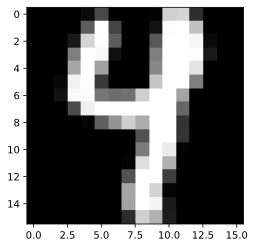

In [6]:
y = wrong_class[3]
out, dist = data_manipulation.test_digit(svd_dict, y)
print(dist.T)
print("You have written the number " + str(out))
plt.imshow(y.reshape(16,16), cmap='gray'); 

Since the number $9$ and number $4$ look very similar in this dataset we expect that there will be some mistakes between these two classes and indeed from the distance vector we see that the distance for the two probable answers was the same to the third digit.

We can go a step further and try to classify locally made samples. In Paint we can draw digits on a black background and save them as a $ 16 \times 16 $ image. Next, we can load the image in Python, and with the `lab2_funs.process_img` function we can "flatten" it to the needed $ 256 \times 1 $ dimension. Let us see two examples on the digits $2$ and $6$.

You have written the number 2
[[2.92637546 3.12781924 2.11833823 3.17227411 2.99833914 3.08964267
  2.95097912 3.28152488 2.95715496 3.3487496 ]]


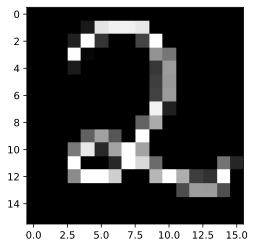

In [8]:
name = "./data/my_digits/dig2_1.png"
y_img = image_manipulation.process_img(name)
out, dist = data_manipulation.test_digit(svd_dict, y_img)
print("You have written the number " + str(out))
print(dist.T)

You have written the number 5
[[2.40783693 2.05169649 2.84997677 2.01404131 2.51329191 1.54417405
  1.94939795 2.70284137 1.83560364 2.18172123]]


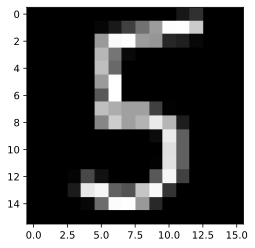

In [9]:
name = "./data/my_digits_28x28/5_0.png"
y_img = image_manipulation.process_img(name)
out, dist = data_manipulation.test_digit(svd_dict, y_img)
print("You have written the number " + str(out))
print(dist.T)

You have written the number 5
[[3.15310459 4.07246552 3.38521327 3.32464276 3.55727546 2.72420639
  3.46473976 3.89255929 2.91974316 3.24537528]]


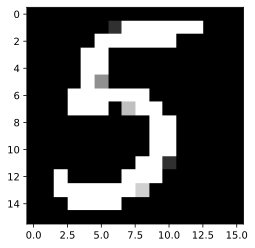

In [13]:
name = image_manipulation.draw_digit()
y_img = image_manipulation.process_img(name)
out, dist = data_manipulation.test_digit(svd_dict, y_img)
print("You have written the number " + str(out))
print(dist.T)